In [1]:
import pandas as pd
import datetime
from altair import Chart,Data

In [2]:
date_str_m0 = datetime.datetime.now().strftime('%Y%m%d')
date_m1 = datetime.datetime.now() + datetime.timedelta(days=-1)
date_str_m1 = date_m1.strftime('%Y%m%d')

In [3]:
datetimes = ['dateReleased','datePlayed', 'dateAdded','reportRunDate']

In [18]:
base_date = datetime.date(2018,1,20)
files_to_load = []
for i in range(24):
    date_str = (base_date + datetime.timedelta(days=i)).strftime('%Y%m%d')
    music_dataframe = pd.read_table('data/PodcastListeningPull'+date_str+'.txt',sep='|',parse_dates=datetimes)
    
    files_to_load.append(music_dataframe)
    
music_df = pd.concat(files_to_load)

In [19]:
records = []
for track in music_df['name'].unique():
    data_by_playDate =  music_df[music_df['name']==track].sort_values('datePlayed',ascending=False).reset_index(drop=True)
    
    for ix,row in data_by_playDate.iterrows():
        curr_row_ix = ix
        next_row_ix = ix + 1
        try:
            curr_row = data_by_playDate.iloc[curr_row_ix]
            next_row = data_by_playDate.iloc[next_row_ix]
        except:
            continue
        curr_row = curr_row.to_frame().T
        true_play_dt = pd.to_datetime(curr_row['reportRunDate'] + datetime.timedelta(-1)).dt
        curr_row.loc[:,'datePlayed'] = datetime.datetime(true_play_dt.year,true_play_dt.month,true_play_dt.day)
        curr_row.loc[:,'playsInDay'] = curr_row['playedCount'] - next_row['playedCount']
        records.append(curr_row)
play_count_over_days = pd.concat(records).reset_index(drop=True)

In [20]:
top_5 = play_count_over_days.sort_values('datePlayed',ascending=False)['album'].unique()[:5]

In [26]:
x = music_df['album'].value_counts()
pd.DataFrame(x)

,album
Composers Datebook,22
Monocle 24: The Monocle Daily,18
Song of the Day,17
The Daily,15
KEXP Song of the Day,13
Marketplace with Kai Ryssdal,13
The Gist,12
Slate's The Gist,9
Pod Save America,8
All Songs Considered,6


In [7]:
c = Chart(play_count_over_days[play_count_over_days['album'].isin(top_5)][['album','datePlayed','playsInDay']])

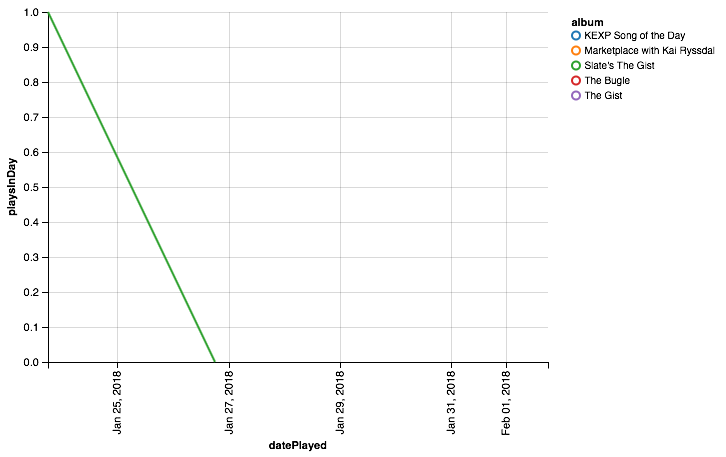

In [9]:
c.mark_bar().encode(
    color='album',
    x = 'datePlayed',
    y = 'playsInDay'
)